### Carrega as bibliotecas

In [1]:
library("daltoolbox")
library("ggplot2")
library("dplyr")
library("RColorBrewer")
library("gridExtra")

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
#Desabilita as Warnings
options(warn = -1)

In [3]:
Sys.setlocale(category = "LC_TIME", locale="pt_BR.UTF-8")

[1] "pt_BR.UTF-8"

### Carrega o Dataset

In [4]:
load('/home/data/flight/bfd.RData')


### 1 - Pré-Processamento

#### 1.1 - Seleção de Atributos

In [5]:
#Filtra as colunas para a Predição e seleciona somente os voos nacionais

subset1 <- select(data |> filter(,
linetype_code == "N"),

"airline_icao",
"origin_icao",
"destination_icao",
"real_depart_date",
"ds_depart_day_period",
"real_arrival_date",
"ds_arrival_day_period",
"real_duration",
"depart_temperature",
"depart_dew_point",
"depart_humidity",
"depart_visibility",
"depart_ceiling",
"depart_wind_speed",
"ds_depart_wind_direction",
"arrival_temperature",
"arrival_dew_point",
"arrival_humidity",
"arrival_visibility",
"arrival_ceiling",
"arrival_wind_speed",
"ds_arrival_wind_direction",
"departure_delay")

#### 1.2 - Remoção dos faltantes

In [6]:
#Filtra as colunas "wind_direction" para remover os "Not Informed" e os NAs das demais colunas

subset2 <- subset1 |> filter(, ds_depart_wind_direction != "Not Informed", ds_arrival_wind_direction != "Not Informed")

subset2 <- na.omit(subset2)

In [7]:
#Filtra as colunas "humidity" para remover os valores maiores que 100

subset3 <- subset2 |> filter(, depart_humidity <= 100, arrival_humidity <= 100)

In [8]:
#Verifica o novo domínio

print(summary(subset3 [, "depart_humidity"], droplevels = TRUE))

print(summary(subset3 [, "arrival_humidity"], droplevels = TRUE))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.90   64.48   74.44   74.17   88.09  100.00 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.34   63.60   74.28   73.80   88.09  100.00 


In [9]:
#Converte as colunas date para o formato de data
subset3$real_depart_date <- strptime(subset3$real_depart_date, format = "%Y%m%d")

subset3$real_arrival_date <- strptime(subset3$real_arrival_date, format = "%Y%m%d")

In [10]:
#Cria as colunas com o dia da semana

subset3$real_depart_weekday <- weekdays(subset3$real_depart_date)

subset3$real_arrival_weekday <- weekdays(subset3$real_arrival_date)

In [11]:
#Apaga os níveis antigos

subset4 <- droplevels(subset3)

In [12]:
#Explora os atributos

for (atributo in colnames(subset4))
{
    print(atributo)
    print(summary(subset4 [,atributo], droplevels = FALSE))
    
}

[1] "airline_icao"
  AZU   GLO   MWM   ONE   OWT   PAM   PTB   TAM   TTL 
86666 80678    17 38278    87   782  2419 75641    25 
[1] "origin_icao"
 SBAR  SBAT  SBAU  SBAX  SBBE  SBBH  SBBR  SBBV  SBBW  SBCA  SBCB  SBCF  SBCG 
 2637    91     9    20  5429    89 19989   333    31   293    95 14542  1741 
 SBCH  SBCJ  SBCP  SBCR  SBCT  SBCX  SBCY  SBCZ  SBDN  SBEG  SBFI  SBFL  SBFN 
  505   473   125    50 11539   183  3398    35   242  3254  1887  4626  1314 
 SBFZ  SBGL  SBGO  SBGR  SBHT  SBIH  SBIL  SBIP  SBIZ  SBJE  SBJP  SBJU  SBJV 
10435 15179  4229 37552   651    47  1625   400   329    64  2750   737   755 
 SBKG  SBKP  SBLE  SBLO  SBMA  SBMG  SBMK  SBML  SBMN  SBMO  SBMQ  SBMS  SBNF 
  339 12099    36  1187   526   666   237     1     1  3546  1025   114  2723 
 SBNM  SBPA  SBPB  SBPF  SBPG  SBPJ  SBPK  SBPL  SBPS  SBPV  SBQV  SBRB  SBRF 
    8  8349    33   148    31   944    94   593  2841  1139   822   269 17680 
 SBRJ  SBRP  SBSG  SBSJ  SBSL  SBSM  SBSN  SBSP  SBSR  SBSV  SB

In [13]:
#Configura as cores e a fonte

colors <- brewer.pal(8, 'Set1')
font <- theme(text = element_text(size=16))

airline_icao,occurrences
<fct>,<int>
AZU,86666
GLO,80678
TAM,75641
ONE,38278
PTB,2419
PAM,782
OWT,87
TTL,25
MWM,17


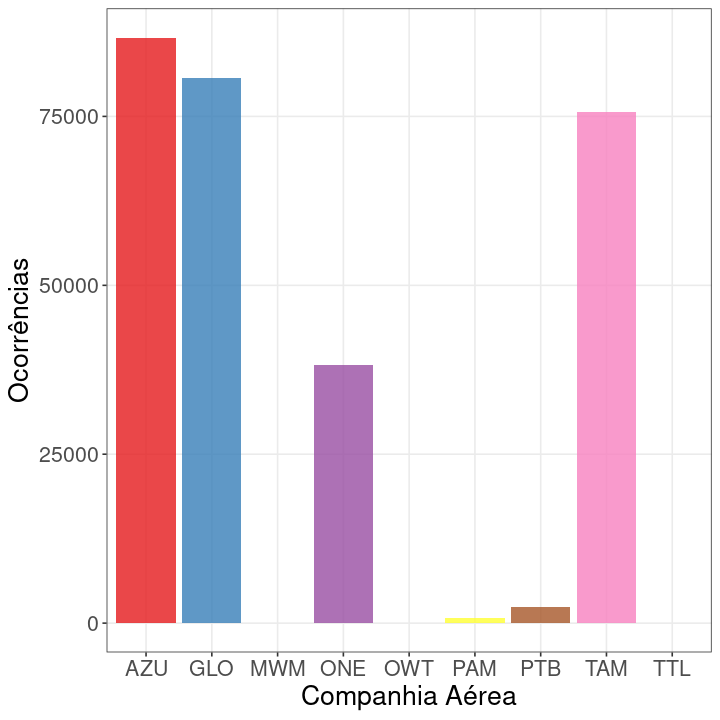

In [14]:
#Plota um gráfico de barras para avaliar as quantidades de cada ocorrência do atributo "airline_icao"

summarize_ai <- subset4 |> dplyr::group_by(airline_icao) |> dplyr::summarize(occurrences=n())

bar_ai <- plot_bar(summarize_ai, label_x = "Companhia Aérea", label_y = "Ocorrências", colors = colors[1:9], alpha = 0.8) + font

options(repr.plot.width=6, repr.plot.height=6)
plot(bar_ai)
summarize_ai[order(summarize_ai$occurrences,decreasing=TRUE),]

In [15]:
#Remove as cias aéreas menores

subset5 <- droplevels(subset4 |> filter(, airline_icao %in% c("AZU", "GLO", "ONE", "TAM")))


origin_icao,occurrences
<fct>,<int>
SBGR,37078
SBSP,30289
SBBR,19880
SBRF,17677
SBRJ,16726
SBGL,15179


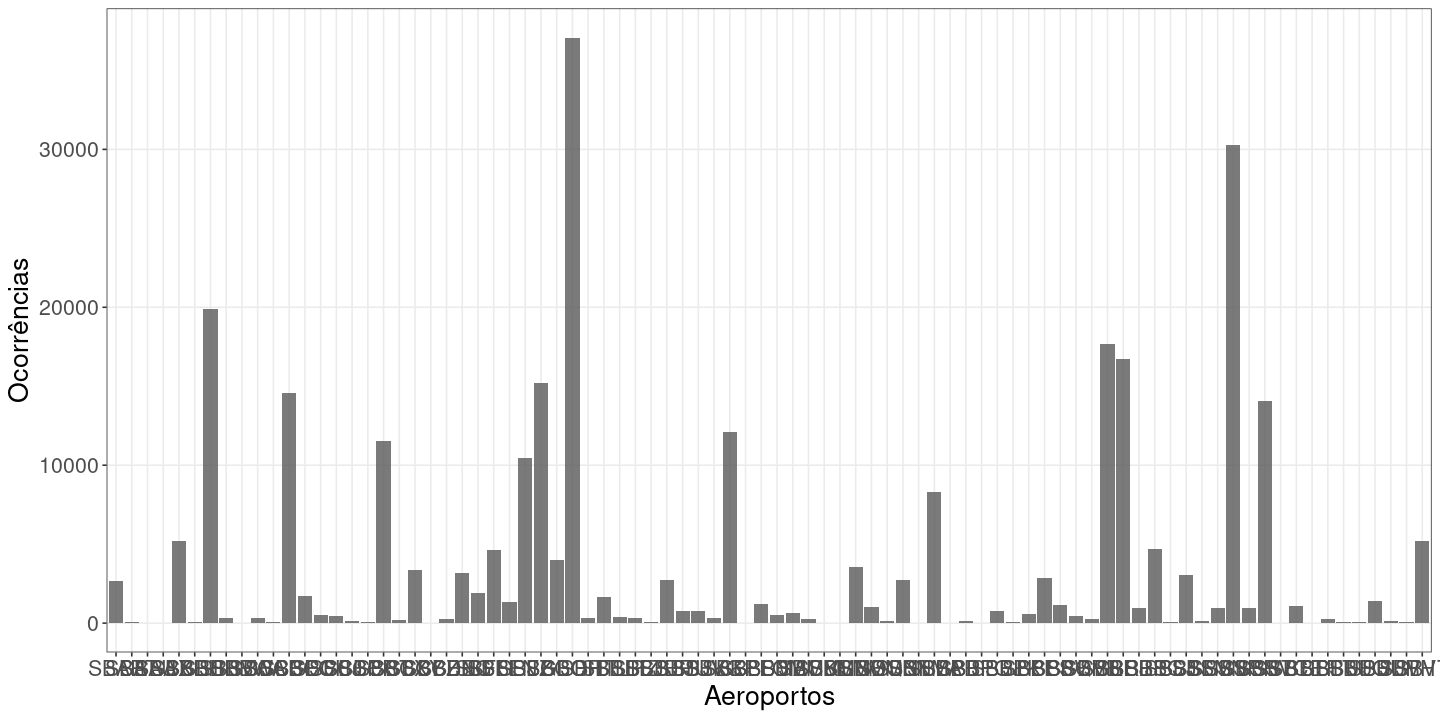

In [16]:
#Plota um gráfico de barras para avaliar as quantidades de cada ocorrência do atributo "origin_icao"

summarize_oi <- subset5 |> dplyr::group_by(origin_icao) |> dplyr::summarize(occurrences=n())

bar_oi <- plot_bar(summarize_oi, label_x = "Aeroportos", label_y = "Ocorrências", alpha = 0.8) + font

options(repr.plot.width=12, repr.plot.height=6)
plot(bar_oi)
head(summarize_oi[order(summarize_oi$occurrences,decreasing=TRUE),])

In [17]:
#Salva os valores únicos de aeroportos de origem

valores_unicos = unique(subset5$origin_icao)

# Salvar os valores num dataset
#write.csv(valores_unicos, "airport_icao.csv")

In [18]:
#Carrega o arquivo de aeroportos/estados/regioes

airports_icao_ibge = read.csv("airports_icao_ibge.csv", header = TRUE)

In [19]:
head(airports_icao_ibge)

,airport_icao,estado_ibge,regiao_ibge
,<chr>,<chr>,<chr>
1,SBJP,Paraíba,Nordeste
2,SBSL,Maranhão,Nordeste
3,SBCT,Paraná,Sul
4,SBFI,Paraná,Sul
5,SBEG,Amazonas,Norte
6,SBRJ,Rio de Janeiro,Sudeste


In [20]:
#Faz o JOIN para obter os estados e regiões dos aeroportos de partida

subset6 <- merge(subset5, airports_icao_ibge, by.x = "origin_icao", by.y = "airport_icao", type = "left")

In [21]:
#Renomeia as colunas

colnames(subset6)[26] ="origin_estado_ibge"
colnames(subset6)[27] ="origin_regiao_ibge"

In [22]:
#Faz o JOIN para obter os estados e regiões dos aeroportos de chegada

subset7 <- merge(subset6, airports_icao_ibge, by.x = "destination_icao", by.y = "airport_icao", type = "left")

In [23]:
#Renomeia as colunas

colnames(subset7)[28] ="destination_estado_ibge"
colnames(subset7)[29] ="destination_regiao_ibge"

origin_regiao_ibge,occurrences
<chr>,<int>
Sudeste,135802
Nordeste,68517
Sul,33096
Centro-Oeste,29191
Norte,14657


destination_regiao_ibge,occurrences
<chr>,<int>
Sudeste,136838
Nordeste,65125
Sul,34082
Centro-Oeste,30032
Norte,15186


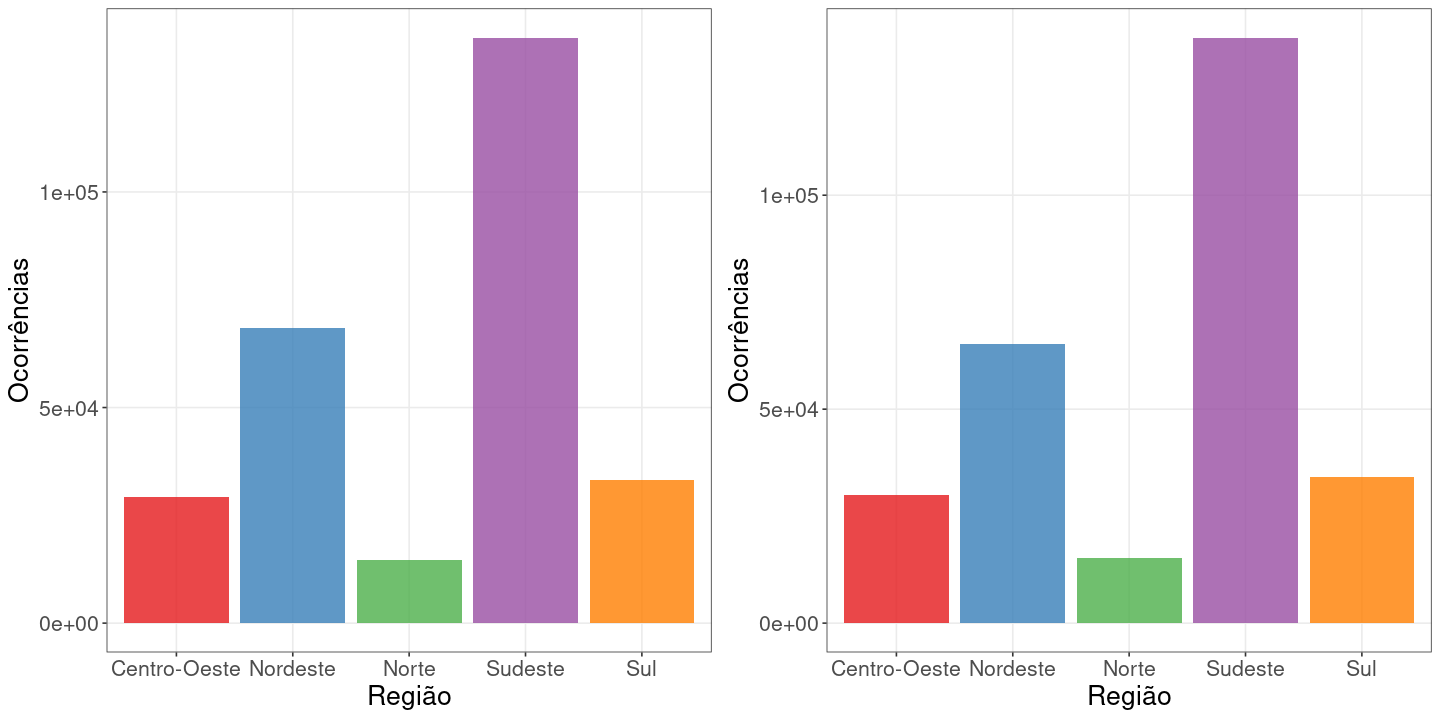

In [24]:
#Plota um gráfico de barras para avaliar as quantidades de cada ocorrência do atributo "estado_ibge"

summarize_ori <- subset7 |> dplyr::group_by(origin_regiao_ibge) |> dplyr::summarize(occurrences=n())
summarize_dri <- subset7 |> dplyr::group_by(destination_regiao_ibge) |> dplyr::summarize(occurrences=n())

bar_ori <- plot_bar(summarize_ori, label_x = "Região", label_y = "Ocorrências", colors = colors[1:5], alpha = 0.8) + font
bar_dri <- plot_bar(summarize_dri, label_x = "Região", label_y = "Ocorrências", colors = colors[1:5], alpha = 0.8) + font

options(repr.plot.width=12, repr.plot.height=6)
grid.arrange(bar_ori, bar_dri, ncol=2)
summarize_ori[order(summarize_ori$occurrences,decreasing=TRUE),] 
summarize_dri[order(summarize_dri$occurrences,decreasing=TRUE),]

In [25]:
#Filtra apenas as colunas que serão usadas para a Predição

dataset <- select(subset7,

"airline_icao",
                  
"real_depart_weekday",
"ds_depart_day_period",
"origin_regiao_ibge",
"depart_temperature",
"depart_dew_point",
"depart_humidity",
"depart_visibility",
"depart_ceiling",
"depart_wind_speed",
"ds_depart_wind_direction",

"real_arrival_weekday",
"ds_arrival_day_period",
"destination_regiao_ibge",
"arrival_temperature",
"arrival_dew_point",
"arrival_humidity",
"arrival_visibility",
"arrival_ceiling",
"arrival_wind_speed",
"ds_arrival_wind_direction",

"real_duration",                 
"departure_delay")

#### 1.3 - Remoção de Outliers

In [26]:
#Calcula os limites : outlier threshold alpha = 3 -> abaixo de Q1 - 3*IQR ou maior que Q3 + 3*IQR

boundaries <- fit(outliers(alpha = 1.5), dataset)

#Remove os outliers

dataset_clean <- transform(boundaries, dataset)

#Calcula a quantidade de outliers removidos

idx <- attr(dataset_clean, "idx")

noutliers <- as.vector(table(idx)[2])

print(paste("Foram removidos",noutliers,"outliers."))


[1] "Foram removidos 107545 outliers."


#### 1.4 - Verifica os atributos após a remoção de outliers

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables



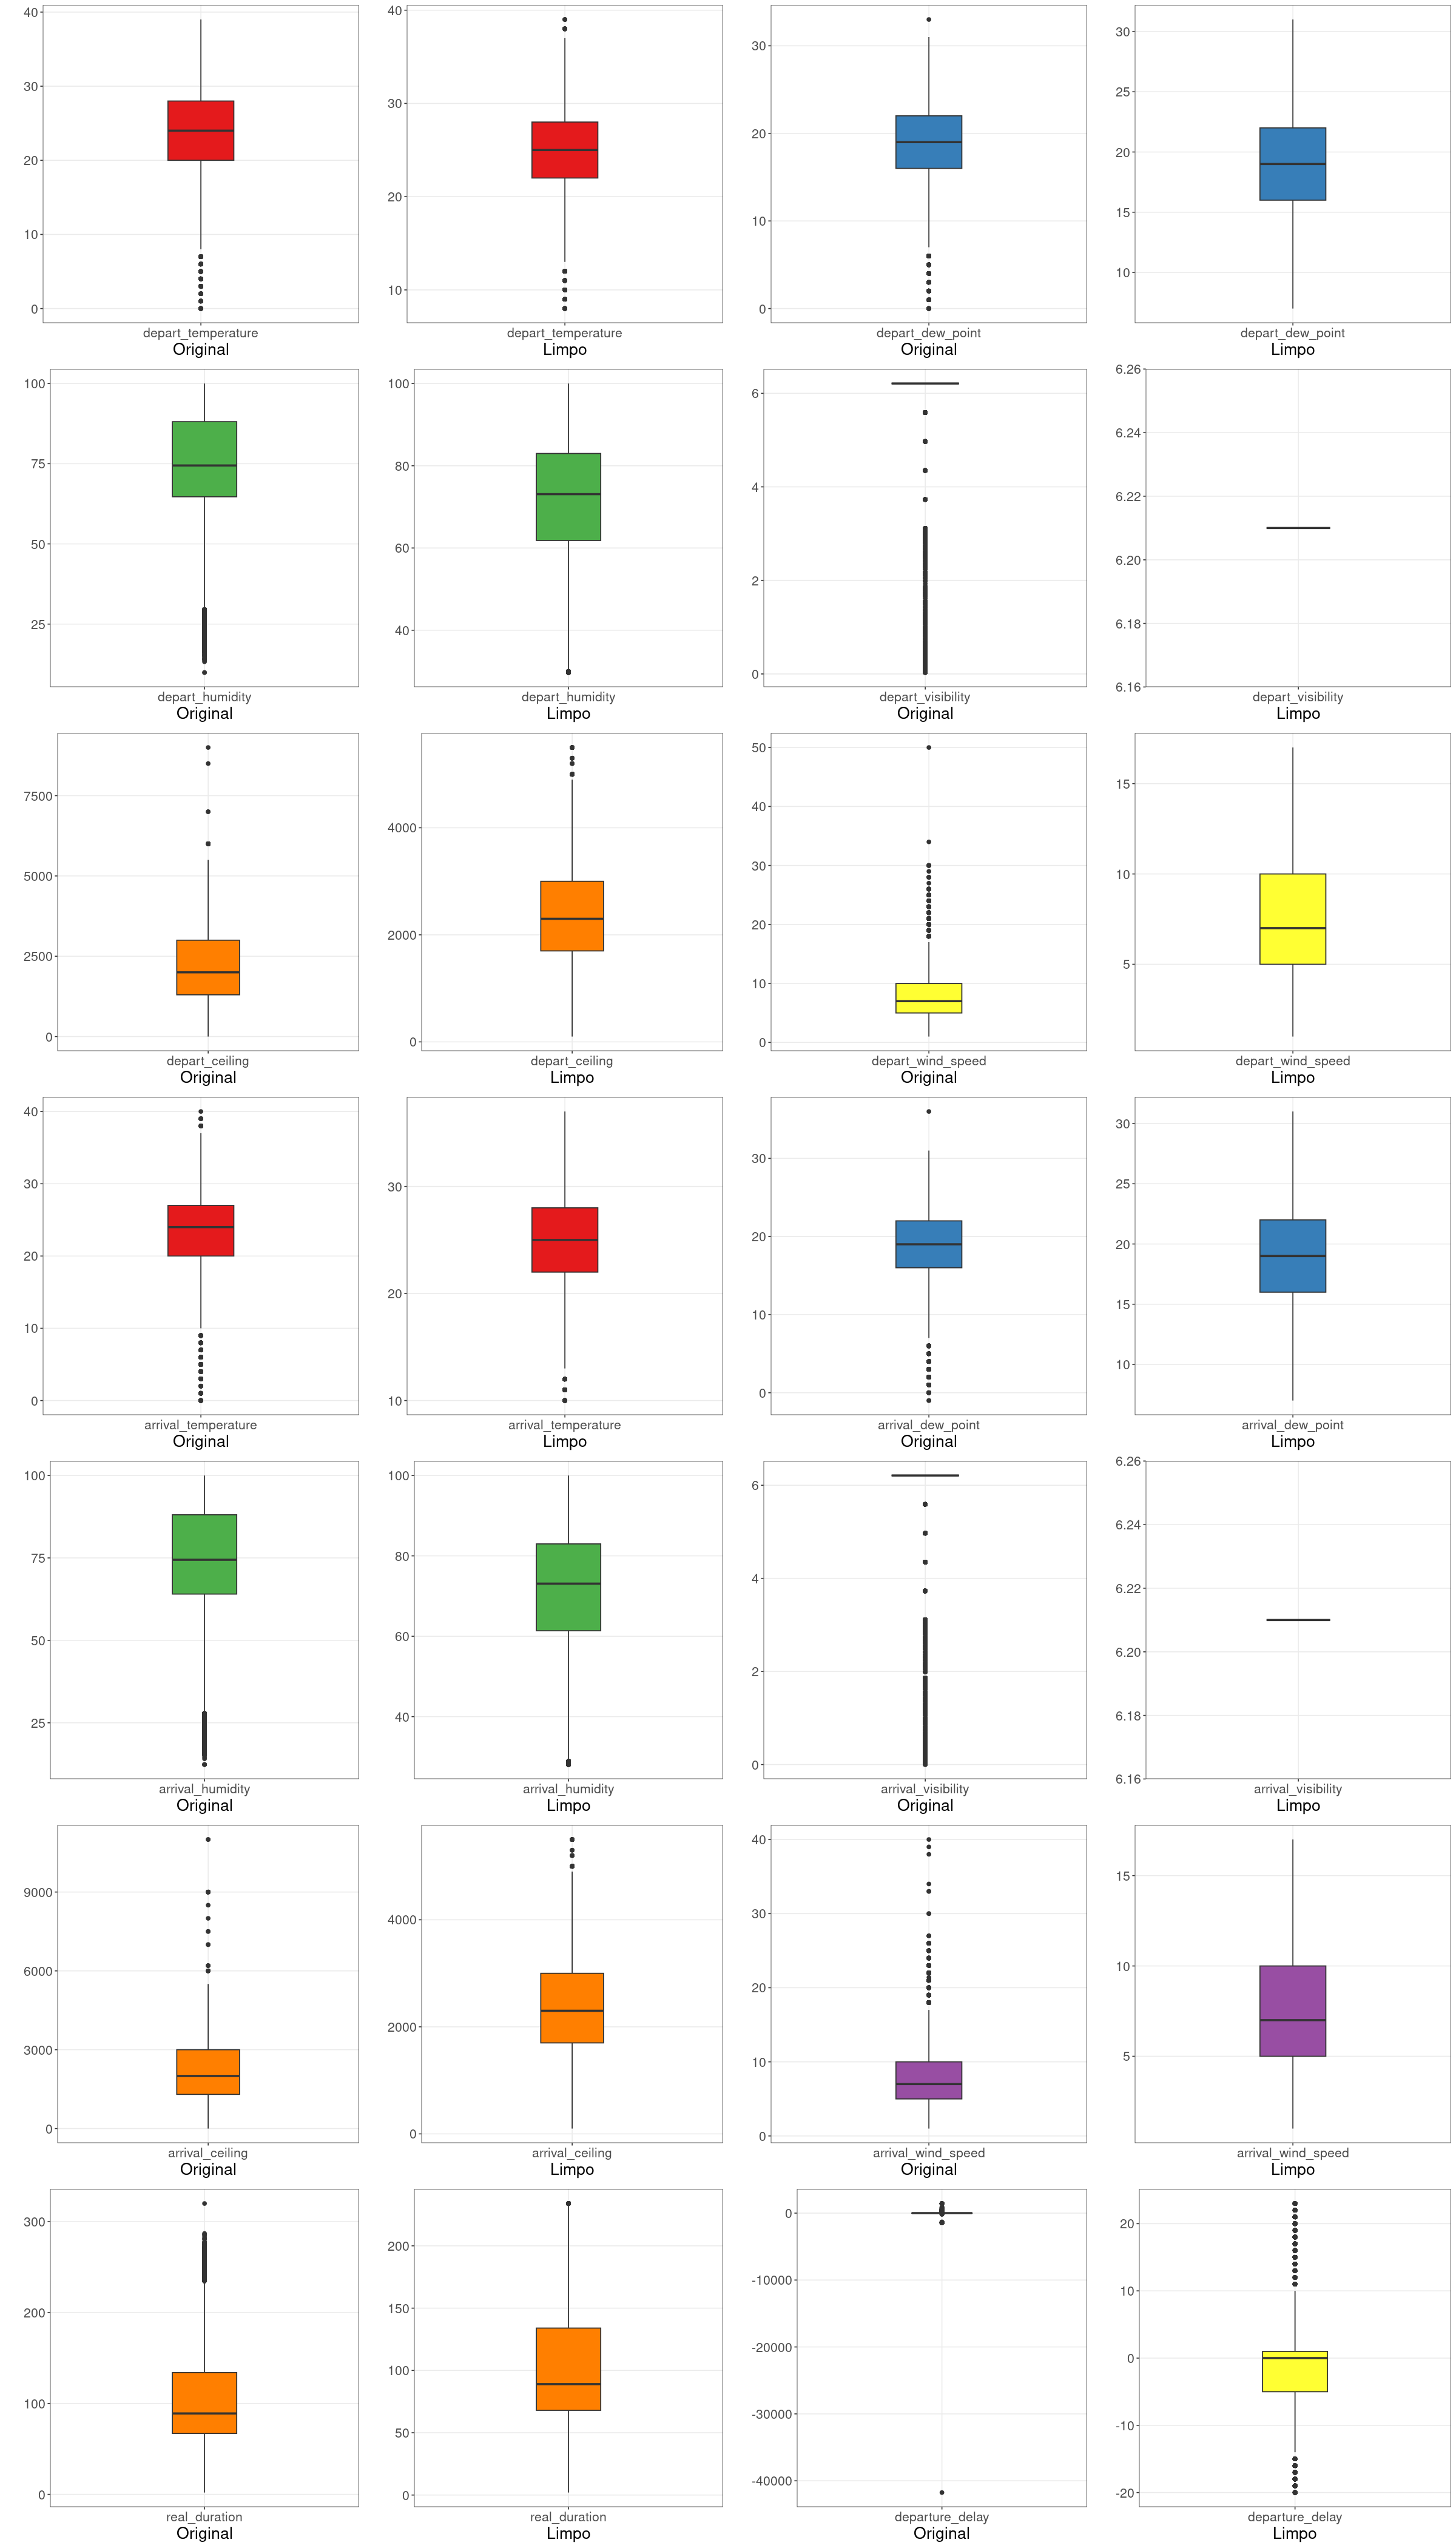

In [27]:
#Imprime os box-plots

box_dt <- plot_boxplot(dataset %>% select(depart_temperature), color=colors[1],
                       label_x = "Original") + font

box_dt_clean <- plot_boxplot(dataset_clean %>% select(depart_temperature), color=colors[1],
                             label_x = "Limpo") + font

box_ddp <- plot_boxplot(dataset %>% select(depart_dew_point), color=colors[2],
                       label_x = "Original") + font

box_ddp_clean <- plot_boxplot(dataset_clean %>% select(depart_dew_point), color=colors[2],
                             label_x = "Limpo") + font

box_dh <- plot_boxplot(dataset %>% select(depart_humidity), color=colors[3],
                       label_x = "Original") + font

box_dh_clean <- plot_boxplot(dataset_clean %>% select(depart_humidity), color=colors[3],
                             label_x = "Limpo") + font

box_dv <- plot_boxplot(dataset %>% select(depart_visibility), color=colors[4],
                       label_x = "Original") + font

box_dv_clean <- plot_boxplot(dataset_clean %>% select(depart_visibility), color=colors[4],
                             label_x = "Limpo") + font

box_dc <- plot_boxplot(dataset %>% select(depart_ceiling), color=colors[5],
                       label_x = "Original") + font

box_dc_clean <- plot_boxplot(dataset_clean %>% select(depart_ceiling), color=colors[5],
                             label_x = "Limpo") + font

box_dws <- plot_boxplot(dataset %>% select(depart_wind_speed), color=colors[6],
                       label_x = "Original") + font

box_dws_clean <- plot_boxplot(dataset_clean %>% select(depart_wind_speed), color=colors[6],
                             label_x = "Limpo") + font

box_at <- plot_boxplot(dataset %>% select(arrival_temperature), color=colors[1],
                       label_x = "Original") + font

box_at_clean <- plot_boxplot(dataset_clean %>% select(arrival_temperature), color=colors[1],
                       label_x = "Limpo") + font

box_adp <- plot_boxplot(dataset %>% select(arrival_dew_point), color=colors[2],
                       label_x = "Original") + font

box_adp_clean <- plot_boxplot(dataset_clean %>% select(arrival_dew_point), color=colors[2],
                             label_x = "Limpo") + font

box_ah <- plot_boxplot(dataset %>% select(arrival_humidity), color=colors[3],
                       label_x = "Original") + font

box_ah_clean <- plot_boxplot(dataset_clean %>% select(arrival_humidity), color=colors[3],
                             label_x = "Limpo") + font

box_av <- plot_boxplot(dataset %>% select(arrival_visibility), color=colors[4],
                       label_x = "Original") + font

box_av_clean <- plot_boxplot(dataset_clean %>% select(arrival_visibility), color=colors[4],
                             label_x = "Limpo") + font

box_ac <- plot_boxplot(dataset %>% select(arrival_ceiling), color=colors[5],
                       label_x = "Original") + font

box_ac_clean <- plot_boxplot(dataset_clean %>% select(arrival_ceiling), color=colors[5],
                             label_x = "Limpo") + font

box_aws <- plot_boxplot(dataset %>% select(arrival_wind_speed), color=colors[4],
                       label_x = "Original") + font

box_aws_clean <- plot_boxplot(dataset_clean %>% select(arrival_wind_speed), color=colors[4],
                             label_x = "Limpo") + font

box_rd <- plot_boxplot(dataset %>% select(real_duration), color=colors[5],
                       label_x = "Original") + font

box_rd_clean <- plot_boxplot(dataset_clean %>% select(real_duration), color=colors[5],
                             label_x = "Limpo") + font

box_dd <- plot_boxplot(dataset %>% select(departure_delay), color=colors[6],
                       label_x = "Original") + font

box_dd_clean <- plot_boxplot(dataset_clean %>% select(departure_delay), color=colors[6],
                       label_x = "Limpo") + font

options(repr.plot.width=20, repr.plot.height=35)
grid.arrange(box_dt, box_dt_clean, box_ddp, box_ddp_clean, box_dh, box_dh_clean, box_dv, box_dv_clean,
             box_dc, box_dc_clean, box_dws, box_dws_clean, box_at, box_at_clean, box_adp, box_adp_clean,
             box_ah, box_ah_clean, box_av, box_av_clean, box_ac, box_ac_clean, box_aws, box_aws_clean,
             box_rd, box_rd_clean, box_dd, box_dd_clean, ncol=4)

In [28]:
#Verifica os atributos de visibilidade

print(summary(dataset_clean [, "depart_visibility"]))
print(summary(dataset_clean [, "arrival_visibility"]))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.21    6.21    6.21    6.21    6.21    6.21 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.21    6.21    6.21    6.21    6.21    6.21 


In [29]:
#Remove as colunas de visibilidade pois ficaram zeradas após a remoção de outliers

final_dataset <- dataset_clean[, !names(dataset_clean) %in% c("depart_visibility", "arrival_visibility")]

#### 1.5 - Normaliza os valores contínuos (min-max)

In [30]:
#Faz a normalização minmax dos atributos numéricos do dataset com exceção do atributo alvo da regressão

final_dataset_norm <- transform(fit(minmax(), select(cbind(final_dataset), - "departure_delay")), final_dataset)

#### 1.6 - Faz o mapeamento categórico dos atributos discretizados

In [31]:
#Faz o mapeamento categórico e deriva um novo dataset

dataset_cm_ai <- transform(categ_mapping("airline_icao"), final_dataset_norm)


dataset_cm_rdw <- transform(categ_mapping("real_depart_weekday"), final_dataset_norm)

dataset_cm_ddp <- transform(categ_mapping("ds_depart_day_period"), final_dataset_norm)

dataset_cm_ori <- transform(categ_mapping("origin_regiao_ibge"), final_dataset_norm)

dataset_cm_dwd <- transform(categ_mapping("ds_depart_wind_direction"), final_dataset_norm)


dataset_cm_raw <- transform(categ_mapping("real_arrival_weekday"), final_dataset_norm)

dataset_cm_adp <- transform(categ_mapping("ds_arrival_day_period"), final_dataset_norm)

dataset_cm_dri <- transform(categ_mapping("destination_regiao_ibge"), final_dataset_norm)

dataset_cm_awd <- transform(categ_mapping("ds_arrival_wind_direction"), final_dataset_norm)

final_dataset_reg <- select(cbind(final_dataset_norm, dataset_cm_ai, dataset_cm_rdw, dataset_cm_ddp, dataset_cm_ori,
                                            dataset_cm_dwd, dataset_cm_raw, dataset_cm_adp, dataset_cm_dri,
                                            dataset_cm_awd),
- "airline_icao", - "real_depart_weekday", - "ds_depart_day_period", - "origin_regiao_ibge", - "ds_depart_wind_direction",
- "real_arrival_weekday", - "ds_arrival_day_period", - "destination_regiao_ibge", - "ds_arrival_wind_direction")


In [32]:
#Visualiza o dataset

print(paste("O dataset está com",nrow(final_dataset_reg),"tuplas."))
head(final_dataset_reg[5:14])

[1] "O dataset está com 173718 tuplas."


,depart_wind_speed,arrival_temperature,arrival_dew_point,arrival_humidity,arrival_ceiling,arrival_wind_speed,real_duration,departure_delay,airline_icaoAZU,airline_icaoGLO
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,0.4375,0.5555556,0.5416667,0.6354283,0.3518519,0.4375,0.2284483,0,0,0
4,0.3125,0.6666667,0.6666667,0.6423804,0.2592593,0.1250,0.5517241,0,0,0
5,0.4375,0.6666667,0.5416667,0.4689933,0.3333333,0.8125,0.6163793,5,0,0
6,0.4375,0.7037037,0.6666667,0.5839822,0.3703704,0.7500,0.3706897,-9,1,0
7,0.5000,0.7407407,0.6250000,0.4751112,0.4074074,0.8125,0.7025862,0,0,0
9,0.3750,0.7037037,0.5833333,0.4720523,0.3148148,0.3750,0.6724138,0,0,1


## 2 - Regressão

### 2.1 - Prepara os conjuntos de treino e teste

In [33]:
# Prepara os conjuntos de treino e teste

datar <- train_test(sample_random(), final_dataset) #dataset sem normalização

trainr <- datar$train
testr <- datar$test

datarnz <- train_test(sample_random(), final_dataset_reg) #dataset normalizado

trainrnz <- datarnz$train
testrnz <- datarnz$test

### 2.1 - Decision Tree

In [34]:
# Define o modelo

model_dtree <- reg_dtree("departure_delay")

# Treina o modelo

trained_model_dtree <- fit(model_dtree, trainr)

# Realiza a predição

prediction_dtree <- predict(trained_model_dtree, testr)

# Avalia a predição

eval_dtree <- evaluate(trained_model_dtree, testr[,"departure_delay"], prediction_dtree)

eval_dtree$metrics

mse,smape
<dbl>,<dbl>
57.78723,1.649252


### 2.2 - KNN

In [35]:
# Define o modelo

model_knn <- reg_knn("departure_delay", k=3)

# Treina o modelo

trained_model_knn <- fit(model_knn, trainrnz)

# Realiza a predição

prediction_knn <- predict(trained_model_knn, testrnz)

# Avalia a predição

eval_knn <- evaluate(trained_model_knn, testrnz[,"departure_delay"], prediction_knn)

eval_knn$metrics

mse,smape
<dbl>,<dbl>
66.10991,NaN


### 2.3 - Multi Layer Perceptron

In [36]:
# Define o modelo

model_mlp <- reg_mlp("departure_delay", size=5, decay=0.54)

# Treina o modelo

trained_model_mlp <- fit(model_mlp, trainrnz)

# Realiza a predição

prediction_mlp <- predict(trained_model_mlp, testrnz)

# Avalia a predição

eval_mlp <- evaluate(trained_model_mlp, testrnz[,"departure_delay"], prediction_mlp)

eval_mlp$metrics

mse,smape
<dbl>,<dbl>
54.45457,1.535288


### 2.4 - Random Forest

In [37]:
# Define o modelo

model_rf <- reg_rf("departure_delay", ntree=10)

# Treina o modelo

trained_model_rf <- fit(model_rf, trainr)

# Realiza a predição

prediction_rf <- predict(trained_model_rf, testr)

# Avalia a predição

eval_rf <- evaluate(trained_model_rf, testr[,"departure_delay"], prediction_rf)

eval_rf$metrics

mse,smape
<dbl>,<dbl>
57.16038,NaN


### 2.5 - SVM *** Após inúmeras tentativas, não tivemos êxito nos testes com SVM

In [38]:
# Define o modelo

#model_svm <- reg_svm("departure_delay", epsilon=0.2,cost=40.000)

# Treina o modelo

#trained_model_svm <- fit(model_svm, trainrnz)

# Realiza a predição

#prediction_svm <- predict(trained_model_svm, testrnz)

# Avalia a predição

#eval_svm <- evaluate(trained_model_svm, testrnz[,"departure_delay"], prediction_svm)

#eval_svm$metrics

## 3 - Resultados

In [39]:
#Cria uma tabela com as métricas consolidadas

model <- c("Decision Tree", "KNN", "Multi Layer Perceptron", "Random Forest", "SVM")
mse <- c(eval_dtree$mse, eval_knn$mse, eval_mlp$mse, eval_rf$mse)
smape <- c(eval_dtree$smape, eval_knn$smape, eval_mlp$smape, eval_rf$smape)

results <- cbind(model, mse, smape)

results

model,mse,smape
Decision Tree,57.7872280189018,1.64925162756048
KNN,66.1099086652851,NaN
Multi Layer Perceptron,54.4545713154658,1.53528823936905
Random Forest,57.1603849193857,NaN
SVM,57.7872280189018,1.64925162756048
